In [1]:
using Plots
using DifferentialEquations

Define the function with the state-space equations for the cart

In [2]:
function cart(du,u,p,t)

    m = 2
    g = 9.81
    l = 0.5
    M = 5
    J_G = 1/12*m*l^2
    f(u,t) = 0
    torque(u,t) = 0

    du[1] = (J_G*u[3] + l^2*m*u[3] - l*m*u[4]*cos(u[2]))/(J_G*M + J_G*m + M*l^2*m + l^2*m^2*sin(u[2])^2)
    du[2] = M*u[4] - l*m*u[3]*cos(u[2]) + m*u[4]/(J_G*M + J_G*m + M*l^2*m + l^2*m^2*sin(u[2])^2)
    du[3] = f(u,t)
    du[4] = 2*l^2*m^2*(J_G*M*g*l*m*cos(u[2]) + J_G*g*l*m^2*cos(u[2]) + J_G*u[3]^2/2 + M*g*l^3*m^2*cos(u[2]) + M*u[4]^2/2 - g*l^3*m^3*cos(u[2])^3 + g*l^3*m^3*cos(u[2]) + l^2*m*u[3]^2/2 - l*m*u[3]*u[4]*cos(u[2]) + m*u[4]^2/2)*sin(u[2])*cos(u[2])/(J_G*M + J_G*m + M*l^2*m + l^2*m^2*sin(u[2])^2)^2 + torque(u,t) - (-J_G*M*g*l*m*sin(u[2]) - J_G*g*l*m^2*sin(u[2]) - M*g*l^3*m^2*sin(u[2]) + 3*g*l^3*m^3*sin(u[2])*cos(u[2])^2 - g*l^3*m^3*sin(u[2]) + l*m*u[3]*u[4]*sin(u[2]))/(J_G*M + J_G*m + M*l^2*m + l^2*m^2*sin(u[2])^2)

end

cart (generic function with 1 method)

Set the integration constants and define the ODEProblem

In [3]:
t0 = 0.0
tf = 10.0
tspan = (t0,tf)

u0 = [0.0, 45*π/180, 0.0, 0.0]

prob = ODEProblem(cart,u0,tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.0, 0.785398, 0.0, 0.0]

Compute the solution to the system of equations using the Dormund-Prince 5/4 Runge-Kutta method

In [4]:
sol = solve(prob,DP5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 86-element Array{Float64,1}:
  0.0                  
  0.0001439770865914465
  0.0015837479525059113
  0.015981456611650558 
  0.07140106385683596  
  0.15916810000992793  
  0.2817061165706674   
  0.3862349436617525   
  0.5049836644697625   
  0.6265250706281817   
  0.7842022292235344   
  0.9160998397188315   
  1.0501542540327484   
  ⋮                    
  8.638107906902668    
  8.744006836424331    
  8.847033645562254    
  8.97412663494408     
  9.101660139501615    
  9.206559979404606    
  9.304558214209287    
  9.426273009760497    
  9.580129196196477    
  9.739041860600182    
  9.8871852494923      
 10.0                  
u: 86-element Array{Array{Float64,1},1}:
 [0.0, 0.785398, 0.0, 0.0]                
 [-1.54447e-8, 0.785399, 0.0, 0.000998729]
 [-1.86877e-6, 0.785447, 0.0, 0.0109862]  
 [-0.000189852, 0.79037, 0.0, 0.111063]   
 [-0.00361234, 0.886194, 0.0, 0.513195]   
 [-0.0133798,

Plot the solution

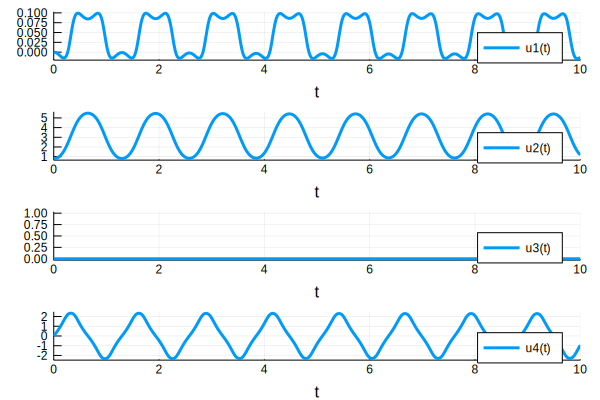

In [5]:
l = @layout [a;b;c;d]
p1 = plot(sol,vars=(0,1))
p2 = plot(sol,vars=(0,2))
p3 = plot(sol,vars=(0,3))
p4 = plot(sol,vars=(0,4))
plot(p1,p2,p3,p4,layout=l)